<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/MLE_and_MOM_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's generate a Normal Distribution using synthetic data, mean = 5, variance = 16

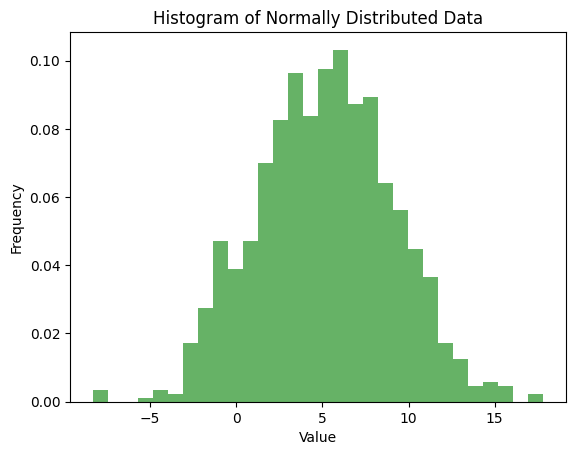

In [31]:
import numpy as np
import matplotlib.pyplot as plt
mean = 5
variance = 16
std_dev = np.sqrt(variance)
sample_size = 1000
data = np.random.normal(mean, std_dev, sample_size)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Method of Moments is a technique where we equate sample moments to population moments as n converges to infinity

# Calculating the Mean of a Normal Distribution Using the Method of Moments

The **method of moments** estimates distribution parameters by equating sample moments to theoretical moments. For a normal distribution with mean $\mu$ and variance $\sigma^2$, we derive the mean ($\mu$) as follows:

## Step-by-Step Derivation

1. **Normal Distribution**: The probability density function is:
   $$
   f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
   $$
   where $\mu$ is the mean and $\sigma^2$ is the variance.

2. **First Theoretical Moment**: The expected value (first moment) is:
   $$
   E(X) = \mu
   $$

3. **First Sample Moment**: For a sample $x_1, x_2, \ldots, x_n$, the first sample moment is the sample mean:
   $$
   m_1 = \frac{1}{n} \sum_{i=1}^n x_i
   $$

4. **Method of Moments**: Equate the sample moment to the theoretical moment:
   $$
   m_1 = E(X) \implies \frac{1}{n} \sum_{i=1}^n x_i = \mu
   $$
   Thus, the estimator for the mean is:
   $$
   \hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i
   $$

## Conclusion
The mean of a normal distribution, estimated using the method of moments, is the **sample mean**, the average of the observed data points.

In [32]:
# Estimate the mean using Method of Moments Estimation (MOM)
# For a normal distribution with known variance, the MOM of the mean is the sample mean
estimated_mean_mom = np.mean(data)
print(f"Estimated mean using MOM (with known variance = {variance}): {estimated_mean_mom}")

Estimated mean using MOM (with known variance = 16): 5.152552718579717


This technique we do usually for quick, simple estimations, mathematical cases and even while calculating average of any distribution to calculate mean, we were unknowingly doing MOM approach only

# Maximum Likelihood Estimation

Let's demonstrate how the Maximum Likelihood Estimate (MLE) for the mean of a normal distribution with known variance is derived by maximizing the likelihood function.

The probability density function (PDF) of a normal distribution is:

$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

For a set of independent and identically distributed (i.i.d.) samples $x_1, x_2, ..., x_n$, the likelihood function is the product of the individual PDFs:

$L(\mu | x_1, ..., x_n, \sigma^2) = \prod_{i=1}^n f(x_i | \mu, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$

To make calculations easier, we often work with the log-likelihood function, since the logarithm is a monotonic transformation and maximizing the log-likelihood is equivalent to maximizing the likelihood:

$LL(\mu | x_1, ..., x_n, \sigma^2) = \log(L(\mu | x_1, ..., x_n, \sigma^2))$
$= \sum_{i=1}^n \log\left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}\right)$
$= \sum_{i=1}^n \left[ \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{(x_i-\mu)^2}{2\sigma^2} \right]$
$= \sum_{i=1}^n \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2}$

To find the value of $\mu$ that maximizes the log-likelihood function, we take the derivative with respect to $\mu$ and set it to zero:

$\frac{\partial LL}{\partial \mu} = \frac{\partial}{\partial \mu} \left[ \sum_{i=1}^n \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2} \right]$

The first term is a constant with respect to $\mu$, so its derivative is 0. For the second term, we use the chain rule:

$\frac{\partial}{\partial \mu} \left[ - \sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2} \right] = - \frac{1}{2\sigma^2} \sum_{i=1}^n \frac{\partial}{\partial \mu} (x_i-\mu)^2$
$= - \frac{1}{2\sigma^2} \sum_{i=1}^n 2(x_i-\mu)(-1)$
$= \frac{1}{\sigma^2} \sum_{i=1}^n (x_i-\mu)$
$= \frac{1}{\sigma^2} \left( \sum_{i=1}^n x_i - \sum_{i=1}^n \mu \right)$
$= \frac{1}{\sigma^2} \left( \sum_{i=1}^n x_i - n\mu \right)$

Now, set the derivative to zero to find the critical points:

$\frac{1}{\sigma^2} \left( \sum_{i=1}^n x_i - n\mu \right) = 0$

Since $\sigma^2 \neq 0$, we can multiply both sides by $\sigma^2$:

$\sum_{i=1}^n x_i - n\mu = 0$

Solve for $\mu$:

$n\mu = \sum_{i=1}^n x_i$
$\mu = \frac{1}{n} \sum_{i=1}^n x_i$

This shows that the MLE of the mean $\mu$ for a normal distribution with known variance is the sample mean.

While we can't directly "maximize" the likelihood function with a simple code snippet in the same way we did with `np.mean`, we can write code to calculate the log-likelihood for a given mean and see how it changes as we vary the mean. However, the analytical solution above clearly demonstrates why the sample mean is the MLE.

Let's calculate the sample mean again to confirm it matches the analytical derivation.

In [33]:
# Calculate the sample mean, which is the MLE for the mean with known variance
estimated_mean_from_derivation = np.sum(data) / len(data)

print(f"Estimated mean based on the analytical derivation (sample mean): {estimated_mean_from_derivation}")

Estimated mean based on the analytical derivation (sample mean): 5.152552718579717


Let's define a Python function to calculate this log-likelihood.

In [43]:
import numpy as np

def log_likelihood_normal(mu, data, variance):
  """
  Calculates the log-likelihood of the data for a given mean,
  assuming the variance is known.

  Args:
    mu: The mean of the distribution.
    data: The dataset (NumPy array).
    variance: The known variance of the distribution.

  Returns:
    The log-likelihood value.
  """
  n = len(data)
  sigma_squared = variance

  # Calculate the log-likelihood term for each data point
  log_likelihood_per_point = np.log(1 / np.sqrt(2 * np.pi * sigma_squared)) - (data - mu)**2 / (2 * sigma_squared)

  # Sum the log-likelihoods for all data points
  total_log_likelihood = np.sum(log_likelihood_per_point)

  return total_log_likelihood

To find the maximum likelihood estimate for the mean, we need to find the value of $\mu$ that maximizes the log-likelihood function $L(\mu | x_1, ..., x_n, \sigma^2)$. Analytically, this involves taking the derivative with respect to $\mu$ and setting it to zero, which we showed earlier results in the sample mean.

Numerically, we can use optimization techniques to find the maximum. Since standard optimization libraries often minimize functions, we can minimize the negative log-likelihood function, which is equivalent to maximizing the log-likelihood function.

In [39]:
from scipy.optimize import minimize

# Define a function that returns the negative log-likelihood.
def negative_log_likelihood_normal(mu, data, variance):
  """
  Calculates the negative log-likelihood of the data for a given mean.

  Args:
    mu: The mean of the distribution (as a NumPy array, as required by minimize).
    data: The dataset (NumPy array).
    variance: The known variance of the distribution.

  Returns:
    The negative log-likelihood value.
  """
  # The minimize function passes the parameter as an array, so we extract the scalar mean
  mean_scalar = mu[0]
  return -log_likelihood_normal(mean_scalar, data, variance)

# Use the minimize function to find the mean that minimizes the negative log-likelihood function.
# We need an initial guess for the mean. The sample mean is a good starting point.
initial_guess = np.array([np.mean(data)]) # minimize expects an array

# Use the minimize function. We pass the negative log-likelihood function,
# the initial guess, and any additional arguments (data and variance) using the 'args' parameter.
# We specify a method, e.g., 'Nelder-Mead'.
result = minimize(negative_log_likelihood_normal, initial_guess, args=(data, variance,), method='Nelder-Mead')

# Extract the estimated mean from the result of the minimize function.
estimated_mean_numerical = result.x[0]

# Print the numerically estimated mean.
print(f"Numerically estimated mean using minimize: {estimated_mean_numerical}")

# Compare with the sample mean (analytical MLE)
sample_mean = np.mean(data)
print(f"Sample mean (analytical MOM approach): {sample_mean}")

Numerically estimated mean using minimize: 5.152552718579717
Sample mean (analytical MOM approach): 5.152552718579717


In [41]:
import scipy.stats as st

# 1. Calculate the standard error of the mean.
standard_error = np.sqrt(variance / sample_size)

# 2. Determine the critical value for a desired confidence level (e.g., 95%).
# For a 95% confidence interval, alpha = 0.05, and we want the z-score for alpha/2 = 0.025 in each tail.
confidence_level = 0.95
alpha = 1 - confidence_level
critical_value = st.norm.ppf(1 - alpha/2) # Inverse of the cumulative distribution function

# 3. Calculate the lower bound of the confidence interval.
lower_bound = estimated_mean_numerical - critical_value * standard_error

# 4. Calculate the upper bound of the confidence interval.
upper_bound = estimated_mean_numerical + critical_value * standard_error

# 5. Print the calculated confidence interval.
print(f"Estimated mean: {estimated_mean_numerical}")
print(f"{confidence_level*100}% Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")

Estimated mean: 5.152552718579717
95.0% Confidence Interval for the Mean: (4.904634705657892, 5.400470731501541)


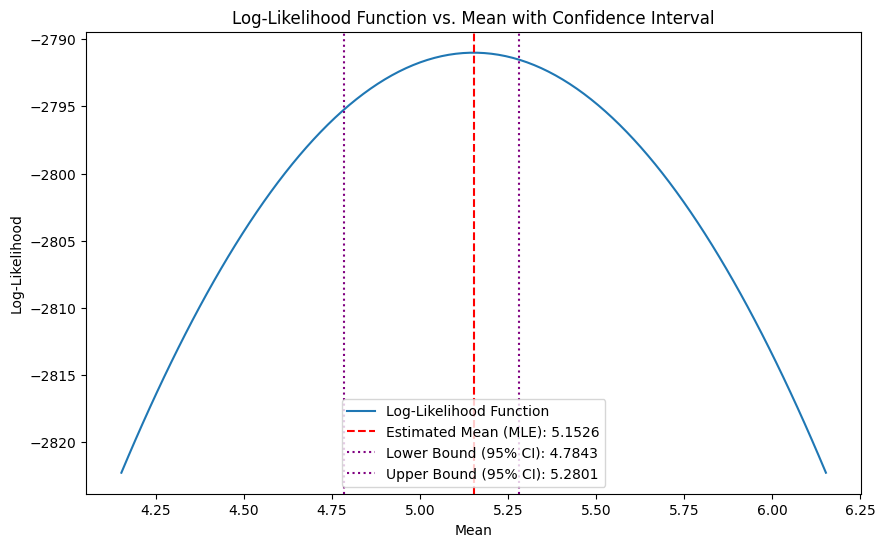

In [40]:
# 1. Create a range of possible mean values
mean_range = np.linspace(estimated_mean_numerical - 1, estimated_mean_numerical + 1, 100)

# 2. Calculate the log-likelihood for each mean value
log_likelihood_values = [log_likelihood_normal(mu, data, variance) for mu in mean_range]

# 3. Plot the mean values on the x-axis and the corresponding log-likelihood values on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(mean_range, log_likelihood_values, label='Log-Likelihood Function')

# 4. Add a vertical line at the numerically estimated mean (MLE)
plt.axvline(estimated_mean_numerical, color='r', linestyle='--', label=f'Estimated Mean (MLE): {estimated_mean_numerical:.4f}')

# 5. Add vertical lines for the confidence interval bounds
plt.axvline(lower_bound, color='purple', linestyle=':', label=f'Lower Bound (95% CI): {lower_bound:.4f}')
plt.axvline(upper_bound, color='purple', linestyle=':', label=f'Upper Bound (95% CI): {upper_bound:.4f}')

# 6. Add labels to the x-axis and y-axis
plt.xlabel("Mean")
plt.ylabel("Log-Likelihood")

# 7. Add a title to the plot
plt.title("Log-Likelihood Function vs. Mean with Confidence Interval")

# 8. Add a legend to the plot
plt.legend()

# 9. Display the plot
plt.show()